<a href="https://colab.research.google.com/github/karsarobert/DeepLearning2025/blob/main/PTE_DL1_ALV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 1. gyakorlat: bevezetés, mire leszek képes a félév végére? Ennél jobbra is :-)
### 2025. szeptrember 3.

## Önvezető autó
[forrás](https://github.com/stephencwelch/self_driving_cars)


- Eredetileg az ALV-t az egyetemek "kísérleti járművének" szánták. A szigorú bemutatóprogramok és más tényezők miatt azonban a kutatóknak nehéz volt időt szakítaniuk az ALV-re.
- A CMU 1,2 millió dollárt kért a DARPA-tól két saját jármű építésére, és 1986 elejére megvásárolt és felszerelt egy Chevy furgont, és a Navlab (NAVigation LABratory) nevet adta neki.
- Maximális sebessége 20 mph! A korai demók 10 centiméter/másodperc sebességgel futottak.


![](https://github.com/stephencwelch/self_driving_cars/blob/master/graphics/navlab.png?raw=1)

- A CMU-n számos megközelítést kipróbáltak, beszéljünk egy különösen érdekes megközelítésről, amelyet a végzős hallgató **Dean Pomerleau** alkalmazott.
- Hogy igazán átérezzük a megközelítését, gondoljunk a megoldandó problémára tágabb értelemben.
- Megpróbálunk **kamerával** autót vezetni, és itt van egy diagram az eddig próbált megközelítésről:

![](../graphics/alv_pipeline-01.png)

![](https://github.com/stephencwelch/self_driving_cars/blob/master/graphics/end-to-end-math-problem-01.png?raw=1)

- Rengeteg módja van annak, hogy a vezetési problémát különálló blokkokra bontva megoldásokat tervezzünk, de általánosságban elmondható, hogy ha az autónk kormányozni akar (vagy teljesen önmagát vezetni), akkor meg kell oldanunk ezt a problémát:

- Ha kamerás autót akarsz vezetni, akkor meg kell találnod a választ erre a matematikai feladatra.
- A látásalapú autonóm vezetés egyik módja a leképezés egy nagyon magas dimenziójú térből (egy vagy több kép) egy nagyon alacsony dimenziójú térbe (csak a kormányszög, vagy az oldalirányú és hosszirányú vezérlés esetén a kormányszög és a sebesség).
- De hogyan is oldjunk meg egy ilyen matematikai problémát? Az ALV tanulmányozásával találtunk egy szuboptimális megoldást, hogyan máshogy közelíthetnénk meg ezt a problémát?
- Íme egy tipp: amikor Pomerleau dékán 1987-ben megjelent a CMU-n a doktori iskolában, egy Geoff Hinton nevű docens épp akkoriban publikált egy jelentést "Experiments on Learning by Back Propagation" címmel.
- Ez érdekes útra vezette Pomerleau-t:

# Mi lenne, ha egy neurális hálózatot használnánk, hogy megtanuljuk az egészet?

- Lehetséges-e betanítani egy neurális hálózatot arra, hogy megtanulja **az összes matematikát** egy autó irányításához?
    - Amikor 2016 júniusában elkezdtem az autonóm vezetéssel foglalkozni, pontosan erről beszélgettem egy régi barátommal és munkatársammal, és azzal érveltem, hogy ez talán nem is lehetséges. Lássuk, hogy igazam volt-e...

# Megtaníthatunk egy neurális hálózatot vezetni?

![](https://github.com/stephencwelch/self_driving_cars/blob/master/videos/images_and_angle_wheego.gif?raw=1)

- Vagy legalábbis kormányozni?
- Megismerhetjük ennek a leképezésnek (vagy egy változatának) a matematikáját?
- Ennek a problémának az előremutató iránya ésszerű, de egy neurális hálózat betanításához meg kell találnunk a **inverz** probléma közelítő megoldását!
    - Vajon a kormánykerék szöge önmagában elegendő információt szolgáltat ahhoz, hogy megtanítsuk egy tanuló algoritmusnak, hogyan értelmezze az útról készült képeket??

- Here's Pomerleau's original NIPS paper: **ALVINN: An Autonomous Land Vehicle In a Neural Network**

- Íme a Dean Pomerleau által használt neurális hálózat architektúrája.
- Pomerleau (legalábbis kezdetben) csak a kék képcsatornát használta, és a képeket csak (30x32) pixelre mintavételezte.
- Az ALVINN kimenete okosan van beállítva - a kormányzási szögeket 30 diszkrét tárolórekeszbe csoportosítják, és a képzési adatokat guasian eloszlásként állítják be az aktuális kormányzási szögnek megfelelő tárolórekesz körül - ez lineárisabbá teszi a problémát - a bemeneti képek kis változásai megfelelnek a kimeneti értékek kis változásainak.

![](https://github.com/stephencwelch/self_driving_cars/blob/master/graphics/question-two-01.png?raw=1)

![](../graphics/spacer_small-01.png)

In [ ]:
30*32*4+30*4 #Plus bias units - but let's be honest, who really cares about counting those?

3960

- ~4k paraméterek
    - Ez vagy sok, vagy semmi, attól függően, hogy milyen szemszögből nézzük a dolgot.
    - A VGG-16, egy modern népszerű mély neurális hálózat 138M paraméterrel rendelkezik!
- Nos, ha képeket akarunk megtanulni a képekről a kormánykerék szögére való leképezéshez (ami remélhetőleg autót fog vezetni!), akkor szükségünk van néhány adatra.
    - Pomerleau ötletében az egyik nagyon klassz dolog az, hogy az adatok gyűjtése egyszerű!
    - Csak tegyünk egy kamerát és egy kormányszög-érzékelőt egy autóra, és rögzítsük, hogyan vezet egy ember!
        - Ezt a technikát **viselkedésklónozásnak** nevezik, és ez egy elképesztően egyszerű módja annak, hogy sok-sok adatot gyűjtsünk.

#Adatok betöltése

In [ ]:
import h5py as h5 # A HDF5 fájl kétféle objektum tárolója: adatkészletek, amelyek tömbszerű adatgyűjtemények,
#és csoportok, amelyek mappaszerű tárolók, amelyek adatkészleteket és más csoportokat tartalmaznak.
%pylab inline
# Amikor a %pylab függvényt beírjuk az IPython parancssorba, az a Matplotlib különböző moduljainak importálását indítja el.
!wget https://github.com/karsarobert/Deeplearning2025/raw/main/track_data_2.h5

data = h5.File('track_data_2.h5', 'r') #adatok importálása


Populating the interactive namespace from numpy and matplotlib
--2025-09-02 16:13:57--  https://github.com/karsarobert/Deeplearning2025/raw/main/track_data_2.h5
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/karsarobert/Deeplearning2025/main/track_data_2.h5 [following]
--2025-09-02 16:13:58--  https://raw.githubusercontent.com/karsarobert/Deeplearning2025/main/track_data_2.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8210048 (7.8M) [application/octet-stream]
Saving to: ‘track_data_2.h5’

track_data_2.h5     100%[===================>]   7.83M  --.-KB/s    in 0.1s    

2025-09-02 16:13:58 (

In [ ]:
data['images']

<HDF5 dataset "images": shape (2000, 60, 64), type "|u1">

#Adatok megtekintése

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3841198930.py:5: SyntaxWarning: invalid escape sequence '\c'
  title(str(round(data['angles'][i*100], 3)) + '$^{\circ}$', fontsize = 24)


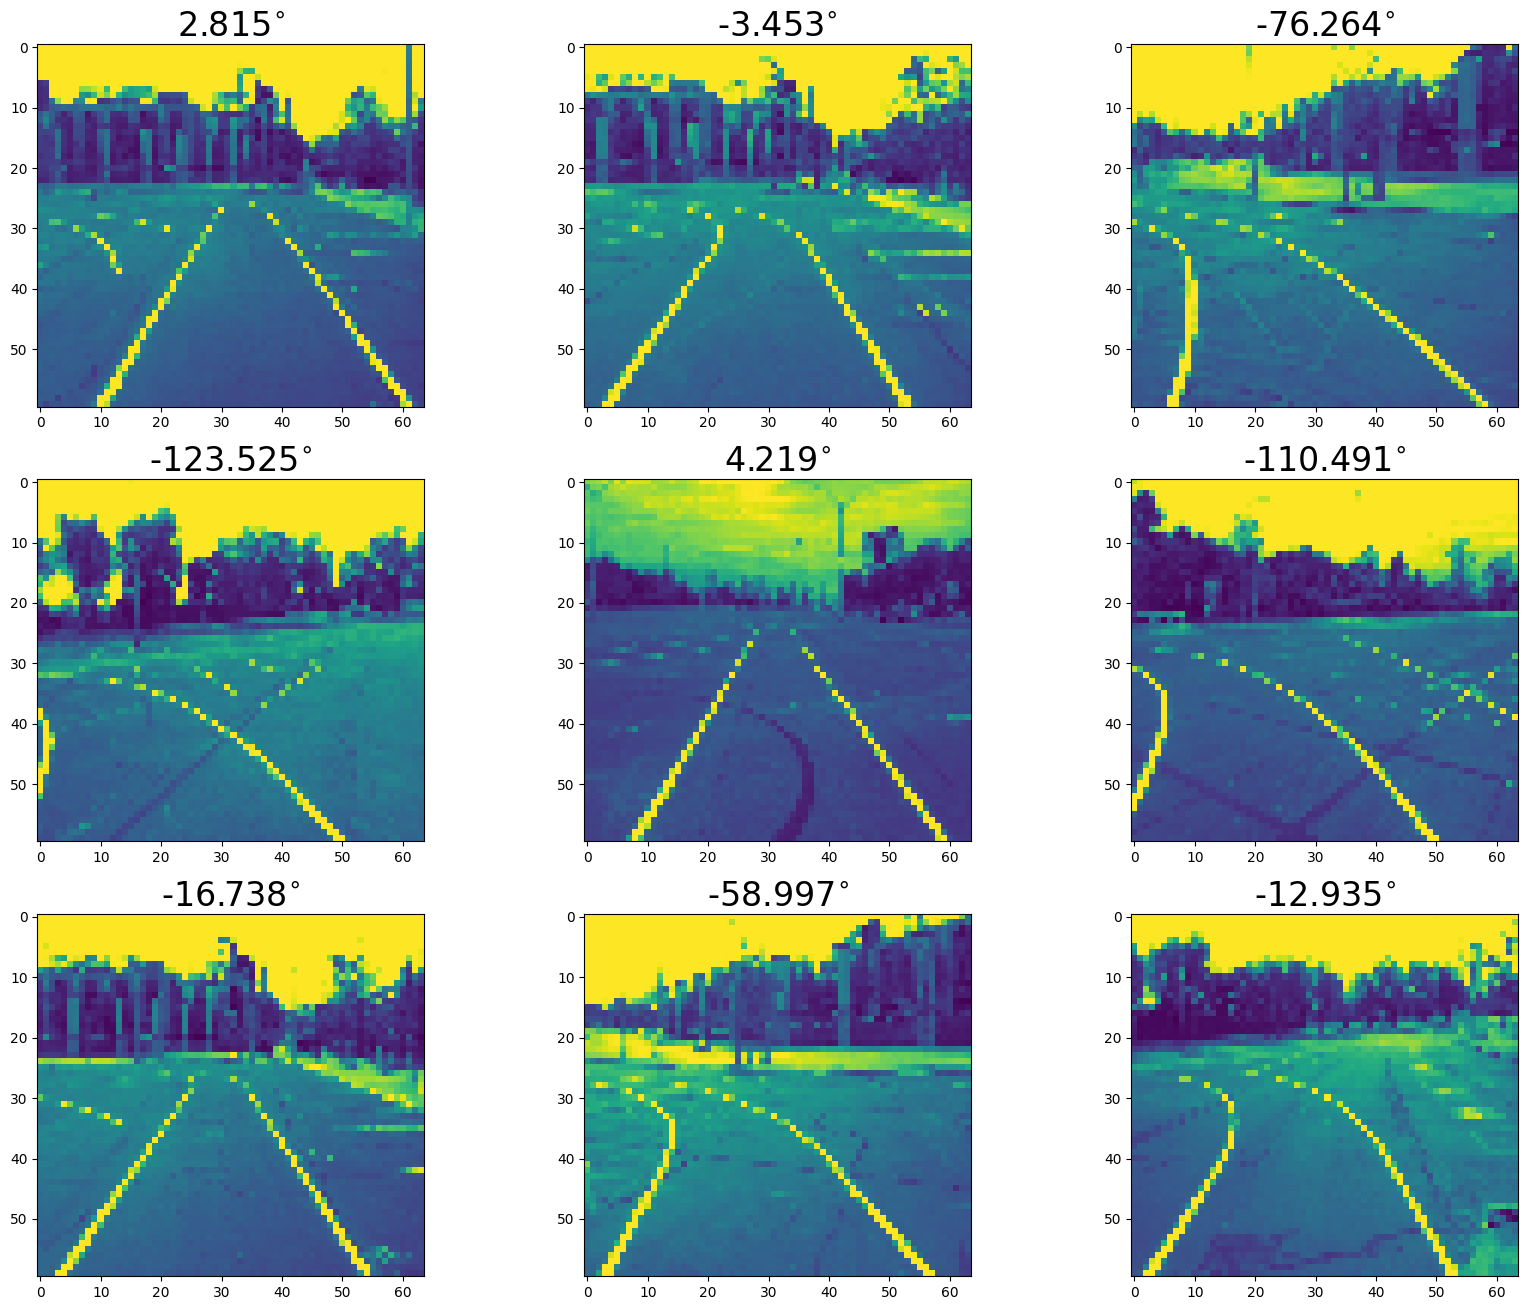

In [ ]:
fig = figure(0, (20, 16))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    imshow(data['images'][i*100, :, :]); grid(0)
    title(str(round(data['angles'][i*100], 3)) + '$^{\circ}$', fontsize = 24)

Képek megjelenítése egy adathalmazból:

1. `fig = figure(0, (20, 16))`
   - Ez létrehoz egy új ábrát (figure) a 0-s azonosítóval.
   - Az ábra mérete 20x16 egység.

2. `for i in range(9):`
   - Ez egy ciklus, ami 9-szer fut le (0-tól 8-ig).

3. `fig.add_subplot(3, 3, i+1)`
   - Az ábrához hozzáad egy új részábrát (subplot).
   - A 3, 3 azt jelenti, hogy egy 3x3-as rácsban helyezkednek el a részábrák.
   - Az `i+1` megadja, hogy melyik pozícióba kerüljön az aktuális részábra (1-től 9-ig).

4. `imshow(data['images'][i*100, :, :])`
   - Megjeleníti a képet az aktuális részábrán.
   - A `data['images']` egy 3D tömb, ami tartalmazza a képeket.
   - Az `i*100`-adik képet választja ki (tehát a 0., 100., 200., stb. képeket).
   - A `:, :` azt jelenti, hogy a kép minden sorát és oszlopát megjeleníti.

5. `grid(0)`
   - Kikapcsolja a rácsot a részábrán.

6. `title(str(round(data['angles'][i*100], 3)) + '$^{\circ}$', fontsize = 24)`
   - Címet ad a részábrának.
   - A `data['angles']` egy tömb, ami a képekhez tartozó szögeket tartalmazza.
   - Az `i*100`-adik szöget választja ki, kerekíti 3 tizedesjegyre, és hozzáfűzi a ° jelet.
   - A `$^{\circ}$` LaTeX szintaxis a ° jelhez, ami szebb megjelenítést eredményez.
   - A betűméret 24-es.

Ez a kód összességében egy 3x3-as rácsban jelenít meg 9 képet egy adathalmazból, minden 100. képet kiválasztva. Minden kép fölött megjelenik egy szögérték címként.

##Adatok felosztása tréning és teszt halmazokra

In [ ]:
training_indices = np.arange(1500)
testing_indices = np.arange(1500, 2000)

images_training = data['images'][training_indices, :, :]/255. #Normalize between 0 and 1

y_train = data['angles'][training_indices]

images_testing = data['images'][testing_indices, :, :]/255. #Normalize between 0 and 1

y_test = data['angles'][testing_indices]

1. `training_indices = np.arange(1500)`
   - Ez létrehoz egy NumPy tömböt, amely tartalmazza a számokat 0-tól 1499-ig.
   - Ezek lesznek a tanító adathalmaz indexei.

2. `testing_indices = np.arange(1500, 2000)`
   - Ez létrehoz egy NumPy tömböt, amely tartalmazza a számokat 1500-tól 1999-ig.
   - Ezek lesznek a teszt adathalmaz indexei.

3. `images_training = data['images'][training_indices, :, :]/255.`
   - Ez kiválasztja a tanító képeket a `data['images']` tömbből.
   - A `training_indices` segítségével az első 1500 képet választja ki.
   - A `:, :` azt jelenti, hogy minden sorát és oszlopát megtartja a képeknek.
   - Az egész kifejezést elosztja 255-tel, ami normalizálja a pixel értékeket 0 és 1 közé.
   
4. `y_train = data['angles'][training_indices]`
   - Ez kiválasztja a tanító címkéket (a képekhez tartozó szögeket) a `data['angles']` tömbből.
   - A `training_indices` segítségével az első 1500 szöget választja ki.

5. `images_testing = data['images'][testing_indices, :, :]/255.`
   - Ez hasonló a 3. lépéshez, de most a tesztelő képeket választja ki.
   - A `testing_indices` segítségével az 1500. és 1999. közötti képeket választja ki.
   - Szintén normalizálja a pixel értékeket 0 és 1 közé.

6. `y_test = data['angles'][testing_indices]`
   - Ez hasonló a 4. lépéshez, de most a tesztelő címkéket választja ki.
   - A `testing_indices` segítségével az 1500. és 1999. közötti szögeket választja ki.

Összefoglalva, ez a kód:
1. Felosztja az adathalmazt tanító (1500 elem) és tesztelő (500 elem) részhalmazokra.
2. Kiválasztja és normalizálja a megfelelő képeket mindkét halmazhoz.
3. Kiválasztja a megfelelő címkéket (szögeket) mindkét halmazhoz.


##Adatok átalakítása, kilapítása

In [ ]:
X_train = images_training.reshape(1500,-1)
X_test = images_testing.reshape(500,-1)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


##A modell felépítése

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(5, activation='relu', kernel_initializer='glorot_normal', input_shape=(n_features,)))
model.add(Dense(3, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(1))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A kódot egy neurális hálózat modell felépítését írja le:

1. `n_features = X_train.shape[1]`
   - Ez a sor meghatározza a bemeneti jellemzők számát.
   - `X_train` egy 2D NumPy tömb vagy DataFrame, ami a tanító adatokat tartalmazza.
   - A `.shape[1]` a tömb második dimenzióját adja meg, ami a jellemzők számát jelenti.
   - Ez azért hasznos, mert így a modell automatikusan alkalmazkodik a bemeneti adatok dimenziójához.

2. `model = Sequential()`
   - Ez létrehoz egy új szekvenciális modellt a Keras könyvtár használatával.
   - A szekvenciális modell egy egyszerű, rétegről rétegre felépített neurális hálózat.

3. `model.add(Dense(5, activation='relu', kernel_initializer='glorot_normal', input_shape=(n_features,)))`
   - Ez hozzáadja az első rejtett réteget a modellhez.
   - `Dense(5)`: Ez egy teljesen összekapcsolt réteg 5 neuronnal.
   - `activation='relu'`: A réteg aktivációs függvénye a ReLU (Rectified Linear Unit).
   - `kernel_initializer='glorot_normal'`: A súlyok inicializálása Glorot/Xavier normál eloszlással történik.
   - `input_shape=(n_features,)`: Megadja a bemeneti adatok alakját, ami megegyezik a jellemzők számával.

4. `model.add(Dense(3, activation='relu', kernel_initializer='glorot_normal'))`
   - Ez hozzáadja a második rejtett réteget.
   - Hasonló az előzőhöz, de most 3 neuronnal.
   - Az `input_shape` itt már nem szükséges, mert a Keras automatikusan kikövetkezteti az előző rétegből.

5. `model.add(Dense(1))`
   - Ez hozzáadja a kimeneti réteget.
   - Egyetlen neuront tartalmaz, ami általában regressziós feladatoknál jellemző.
   - Nincs megadva aktivációs függvény, ami azt jelenti, hogy lineáris aktivációt használ (alapértelmezett).

Összefoglalva, ez a kód egy háromrétegű neurális hálózatot hoz létre:
- Egy bemeneti réteg (implicit módon definiálva az első rejtett réteg `input_shape` paraméterével)
- Két rejtett réteg (5 és 3 neuronnal, ReLU aktivációval)
- Egy kimeneti réteg (1 neuronnal, lineáris aktivációval)


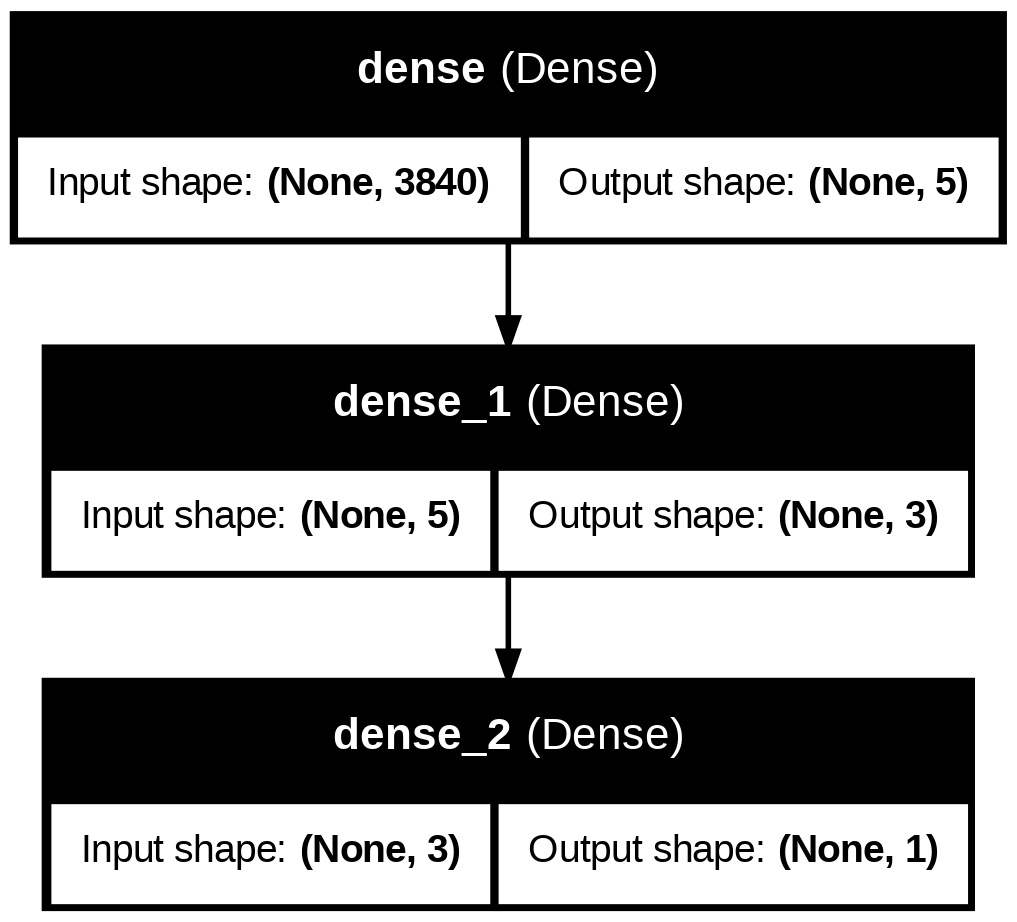

In [ ]:
import tensorflow
tensorflow.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │        19,205 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,227 (75.11 KB)

 Trainable params: 19,227 (75.11 KB)

 Non-trainable params: 0 (0.00 B)

## A modell illesztése

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(X_test, y_test))

z = model.predict(X_test)

Epoch 1/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5663.3311 - val_loss: 3475.9714
Epoch 2/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2986.6184 - val_loss: 2573.9160
Epoch 3/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2668.0803 - val_loss: 2490.3123
Epoch 4/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2575.5215 - val_loss: 2347.7268
Epoch 5/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2414.4207 - val_loss: 2292.6262
Epoch 6/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2335.7507 - val_loss: 2110.9771
Epoch 7/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2137.4429 - val_loss: 1989.8563
Epoch 8/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2178.7734 - val_loss: 1859.0330
Epoch 9/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1859.7975 - val_loss: 1719.2275
Epoch 10/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1742.8350 - val_loss: 1546.7878
Epoch 11/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1446.8228 - val_loss: 1343.67

A kód egy neurális hálózat modell összeállítását, tanítását és tesztelését végzi:

1. `model.compile(optimizer='adam', loss='mse')`
   - Ez a sor "összeállítja" a modellt, vagyis beállítja a tanulási folyamat paramétereit.
   - `optimizer='adam'`: Az Adam optimalizálót használja. Ez egy népszerű, adaptív tanulási rátával rendelkező algoritmus.
   - `loss='mse'`: A veszteségfüggvény az MSE (Mean Squared Error, átlagos négyzetes hiba). Ez tipikus választás regressziós problémákhoz.

2. `history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(X_test, y_test))`
   - Ez a sor elindítja a modell tanítását és visszaadja a tanulási folyamat történetét.
   - `X_train, y_train`: A tanító adatok és címkék.
   - `epochs=150`: A tanítás 150 epochon (teljes adathalmazon való áthaladáson) keresztül történik.
   - `batch_size=32`: Az adatokat 32-es csoportokban (batch-ekben) dolgozza fel.
   - `verbose=1`: A tanítás során részletes kimenetet ad a folyamatról.
   - `validation_data=(X_test, y_test)`: Megadja a validációs (teszt) adatokat. A modell minden epoch után kiértékeli a teljesítményét ezeken az adatokon.

3. `z = model.predict(X_test)`
   - Ez a sor használja a betanított modellt előrejelzések készítésére a tesztadatokon.
   - `X_test`: A tesztadatok, amelyekre az előrejelzést végzi.
   - Az eredményt a `z` változóban tárolja.

Néhány további megjegyzés:

- A `model.compile()` függvény beállítja, hogyan fogja a modell optimalizálni a súlyait. Az Adam optimalizáló és az MSE veszteségfüggvény jó választások regressziós problémákhoz.

- A `model.fit()` függvény végzi a tényleges tanítást. A visszatérési értéke (`history`) tartalmazza a tanulási folyamat részletes statisztikáit, amit később fel lehet használni a tanulási folyamat vizualizálására vagy elemzésére.

- A validációs adatok használata (`validation_data`) lehetővé teszi, hogy nyomon kövessük, mennyire jól általánosít a modell olyan adatokra, amelyeket nem látott a tanítás során. Ez segít észlelni az túltanulást (overfitting).

- A `model.predict()` függvény használja a betanított modellt új előrejelzések készítésére. Ez hasznos a modell teljesítményének értékeléséhez és a tényleges használathoz.


##A veszteség, költségfüggvény alakulása


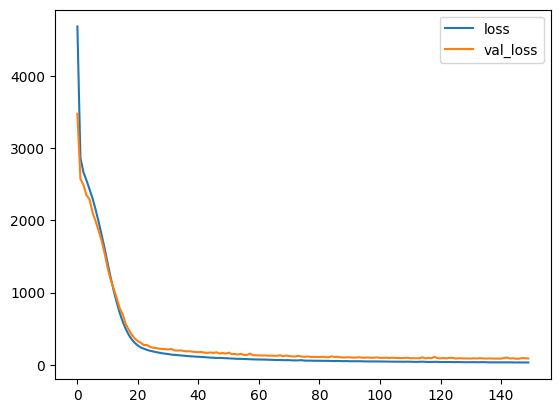

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot();

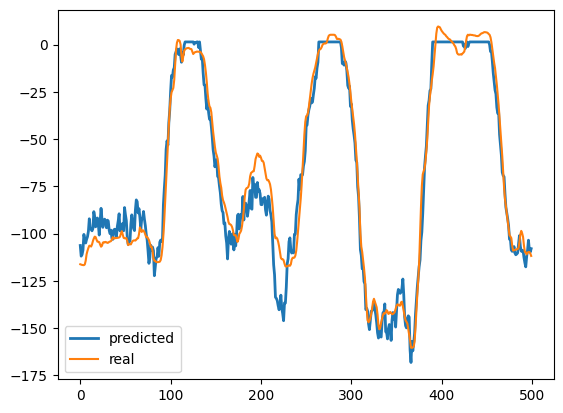

In [ ]:
plot(z, linewidth = 2)
plot(y_test)
legend(['predicted', 'real'])

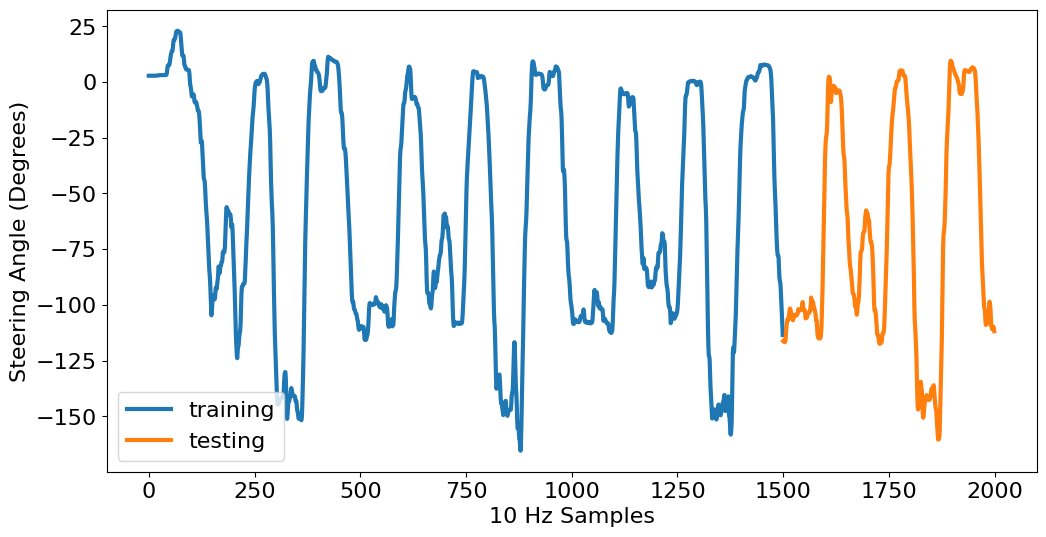

In [ ]:
fig = figure(0, (12, 6))
plot(training_indices, data['angles'][:][training_indices], linewidth = 3)
plot(testing_indices, data['angles'][:][testing_indices], linewidth = 3)
ylabel('Steering Angle (Degrees)', fontsize = 16); xlabel('10 Hz Samples', fontsize = 16)
for tick in gca().xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
legend(['training', 'testing'], fontsize = 16)

# Ugyanez a probléma Random Forest Regressor segítségével

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 8, random_state=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

8.022789412434545

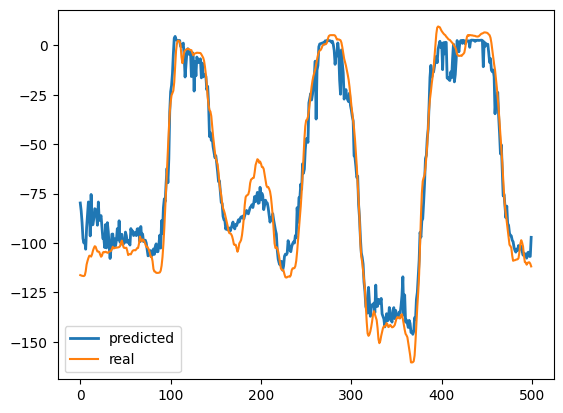

In [ ]:
plot(y_pred, linewidth = 2)
plot(y_test)
legend(['predicted', 'real'])

In [ ]:
import time
print(time.ctime())

Tue Sep  2 16:19:51 2025
